| Submitted By    | Amity Lu        |
| --------------- | --------------- |
| Github Username | Amitywen        |


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from metric_learn import MLKR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
data =  pd.read_csv('parkinsons_updrs.data', sep=",")
data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [4]:
# check the data value
print(data.isnull().values.any())


False


In [5]:
df = data.drop(columns = 'subject#')
df_X = data.drop(columns = ['motor_UPDRS','total_UPDRS'])
df_mo = data['motor_UPDRS']
df_to = data['total_UPDRS']

feat = df_X.columns.tolist()

# standarize the features
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit
scaler = StandardScaler()
df_X = scaler.fit_transform(df_X)

## 4(b)

In [94]:
# http://contrib.scikit-learn.org/metric-learn/generated/metric_learn.MLKR.html#%20metric-learn-mlkr
# Decide the scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Example: http://contrib.scikit-learn.org/metric-learn/auto_examples/plot_metric_learning_examples.html#sphx-glr-auto-examples-plot-metric-learning-examples-py
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

def ML(initA,p,):
        
        k_folds = KFold(n_splits = 5, shuffle = True)

        # train motor_UPDRS
        mlkr1 = MLKR(n_components = p, init=initA)
        X_mlkr1 = mlkr1.fit_transform(df_X , df_mo)

        # randomly choose 70% of the data as the training set
        X_train_mo, X_test_mo, y_train_mo, y_test_mo = train_test_split(X_mlkr1, df_mo, test_size=0.3)
        reg1 = LinearRegression()
        print('for estimate motor_UPDRS')
        scores = cross_val_score(reg1, X_train_mo, y_train_mo, cv = k_folds)
        print("Average CV Score: ", scores.mean(), "with", len(scores), "of CV Sores used")
        reg1 = reg1.fit(X_train_mo, y_train_mo)
        print('test set R^2',reg1.score(X_test_mo, y_test_mo))


        # train total_UPDRS
        mlkr2 = MLKR(n_components = p, init=initA)
        X_mlkr2 = mlkr2.fit_transform(df_X , df_to)

        # randomly choose 70% of the data as the training set
        X_train_to, X_test_to, y_train_to, y_test_to = train_test_split(X_mlkr2, df_to, test_size=0.3)
        reg2 = LinearRegression()
        print('for estimate total_UPDRS')
        scores = cross_val_score(reg2,X_train_to, y_train_to, cv = k_folds)
        print("Average CV Score: ", scores.mean(), "with", len(scores), "of CV Sores used")
        reg2 = reg2.fit(X_train_to, y_train_to)
        print('test set R^2', reg2.score(X_test_to, y_test_to))

In [95]:
init = ['auto', 'pca']
p = len(feat)
M = [5,10,15, p]

for i in init:
    for j in M:
        print('init', i,'with, M = ',j)
        ML(i,j)

init auto with, M =  5
for estimate motor_UPDRS
Average CV Score:  0.16351678402106842 with 5 of CV Sores used
test set R^2 0.16011671904345492
for estimate total_UPDRS
Average CV Score:  0.184759235001632 with 5 of CV Sores used
test set R^2 0.2042846397046557
init auto with, M =  10
for estimate motor_UPDRS
Average CV Score:  0.21298433696293112 with 5 of CV Sores used
test set R^2 0.1823625381205406
for estimate total_UPDRS
Average CV Score:  0.22859250417332905 with 5 of CV Sores used
test set R^2 0.24609317820083154
init auto with, M =  15
for estimate motor_UPDRS
Average CV Score:  0.19904786274101707 with 5 of CV Sores used
test set R^2 0.21335026542975744
for estimate total_UPDRS
Average CV Score:  0.24337898590470458 with 5 of CV Sores used
test set R^2 0.2534960980751807
init auto with, M =  20
for estimate motor_UPDRS
Average CV Score:  0.21985807075978653 with 5 of CV Sores used
test set R^2 0.18919503307962438
for estimate total_UPDRS
Average CV Score:  0.24872977787494044

**Observation:**
> We can find out   

> for estimate motor_UPDRS, with init: pca with, M = 20 is the best combiination      
Average CV Score:  0.20009785070836933 with 5 of CV Sores used     
test set R^2 0.22708404218349276     
     
          
> for estimate total_UPDRS, with init: pca with, M = 20 is the best combiination     
Average CV Score:  0.23700415109114506 with 5 of CV Sores used     
test set R^2 0.2638420191308676     

## 4(c)

In [19]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://stats.stackexchange.com/questions/338255/what-is-effect-of-increasing-number-of-hidden-layers-in-a-feed-forward-nn

def MLPR_withoutearlystop(i,j,k,l):
    #print('for estimate motor_UPDRS')
    regr1 = MLPRegressor(hidden_layer_sizes = i, activation = j, solver = k, alpha = l, max_iter=6000)
    X_train_mo, X_test_mo, y_train_mo, y_test_mo = train_test_split(df_X, df_mo, test_size=0.3)
    regr1 = regr1.fit(X_train_mo, y_train_mo)
    # print('the training set R^2', regr1.score(X_train_mo, y_train_mo))
    # print('the test set R^2',regr1.score(X_test_mo,y_test_mo))


    #print('for estimate total_UPDRS')
    regr2 = MLPRegressor(hidden_layer_sizes = i, activation = j, solver = k, alpha = l, max_iter=6000)
    X_train_to, X_test_to, y_train_to, y_test_to = train_test_split(df_X, df_to, test_size=0.3)
    regr2 = regr2.fit(X_train_to, y_train_to)
    # print('the training set R^2',regr2.score(X_train_to, y_train_to))
    # print('the test set R^2',regr2.score(X_test_to,y_test_to))

    return regr1.score(X_train_mo, y_train_mo), regr1.score(X_test_mo,y_test_mo), regr2.score(X_train_to, y_train_to), regr2.score(X_test_to,y_test_to)

In [20]:
ly_size = [50,100]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
alpha = np.logspace(-3,3,7)
df1 = pd.DataFrame(columns = ['mo_tr_score', 'mo_te_score', 'to_tr_score', 'to_te_score', 'ly_size', 'activation', 'solver', 'alpha'])

for i in ly_size:
    for j in activation:
        for k in solver:
            for l in alpha:
                print('hidden_layer_size =', i, ',activation =', j, ',solver =', k, ',alpha =', l)
                mo_tr_score, mo_te_score, to_tr_score, to_te_score = MLPR_withoutearlystop(i,j,k,l)
                df1.loc[len(df1)] = [mo_tr_score, mo_te_score, to_tr_score, to_te_score, i, j, k, l]

hidden_layer_size = 50 ,activation = identity ,solver = lbfgs ,alpha = 0.001
hidden_layer_size = 50 ,activation = identity ,solver = lbfgs ,alpha = 0.01
hidden_layer_size = 50 ,activation = identity ,solver = lbfgs ,alpha = 0.1
hidden_layer_size = 50 ,activation = identity ,solver = lbfgs ,alpha = 1.0
hidden_layer_size = 50 ,activation = identity ,solver = lbfgs ,alpha = 10.0
hidden_layer_size = 50 ,activation = identity ,solver = lbfgs ,alpha = 100.0
hidden_layer_size = 50 ,activation = identity ,solver = lbfgs ,alpha = 1000.0
hidden_layer_size = 50 ,activation = identity ,solver = sgd ,alpha = 0.001
hidden_layer_size = 50 ,activation = identity ,solver = sgd ,alpha = 0.01
hidden_layer_size = 50 ,activation = identity ,solver = sgd ,alpha = 0.1
hidden_layer_size = 50 ,activation = identity ,solver = sgd ,alpha = 1.0
hidden_layer_size = 50 ,activation = identity ,solver = sgd ,alpha = 10.0
hidden_layer_size = 50 ,activation = identity ,solver = sgd ,alpha = 100.0
hidden_layer_size = 50

/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = logistic ,solver = lbfgs ,alpha = 0.01


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = logistic ,solver = lbfgs ,alpha = 0.1


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = logistic ,solver = lbfgs ,alpha = 1.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = logistic ,solver = lbfgs ,alpha = 10.0
hidden_layer_size = 50 ,activation = logistic ,solver = lbfgs ,alpha = 100.0
hidden_layer_size = 50 ,activation = logistic ,solver = lbfgs ,alpha = 1000.0
hidden_layer_size = 50 ,activation = logistic ,solver = sgd ,alpha = 0.001
hidden_layer_size = 50 ,activation = logistic ,solver = sgd ,alpha = 0.01
hidden_layer_size = 50 ,activation = logistic ,solver = sgd ,alpha = 0.1
hidden_layer_size = 50 ,activation = logistic ,solver = sgd ,alpha = 1.0
hidden_layer_size = 50 ,activation = logistic ,solver = sgd ,alpha = 10.0
hidden_layer_size = 50 ,activation = logistic ,solver = sgd ,alpha = 100.0
hidden_layer_size = 50 ,activation = logistic ,solver = sgd ,alpha = 1000.0
hidden_layer_size = 50 ,activation = logistic ,solver = adam ,alpha = 0.001
hidden_layer_size = 50 ,activation = logistic ,solver = adam ,alpha = 0.01
hidden_layer_size = 50 ,activation = logistic ,solver = adam ,alpha = 0.1
hidden_layer_size = 50 ,

/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = tanh ,solver = lbfgs ,alpha = 0.01


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = tanh ,solver = lbfgs ,alpha = 0.1


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = tanh ,solver = lbfgs ,alpha = 1.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = tanh ,solver = lbfgs ,alpha = 10.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = tanh ,solver = lbfgs ,alpha = 100.0
hidden_layer_size = 50 ,activation = tanh ,solver = lbfgs ,alpha = 1000.0
hidden_layer_size = 50 ,activation = tanh ,solver = sgd ,alpha = 0.001
hidden_layer_size = 50 ,activation = tanh ,solver = sgd ,alpha = 0.01
hidden_layer_size = 50 ,activation = tanh ,solver = sgd ,alpha = 0.1
hidden_layer_size = 50 ,activation = tanh ,solver = sgd ,alpha = 1.0
hidden_layer_size = 50 ,activation = tanh ,solver = sgd ,alpha = 10.0
hidden_layer_size = 50 ,activation = tanh ,solver = sgd ,alpha = 100.0
hidden_layer_size = 50 ,activation = tanh ,solver = sgd ,alpha = 1000.0
hidden_layer_size = 50 ,activation = tanh ,solver = adam ,alpha = 0.001
hidden_layer_size = 50 ,activation = tanh ,solver = adam ,alpha = 0.01
hidden_layer_size = 50 ,activation = tanh ,solver = adam ,alpha = 0.1
hidden_layer_size = 50 ,activation = tanh ,solver = adam ,alpha = 1.0
hidden_layer_size = 50 ,activation = tanh ,solver = adam ,alpha = 10.0
hidden_

/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = relu ,solver = lbfgs ,alpha = 0.01


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = relu ,solver = lbfgs ,alpha = 0.1


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = relu ,solver = lbfgs ,alpha = 1.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = relu ,solver = lbfgs ,alpha = 10.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 50 ,activation = relu ,solver = lbfgs ,alpha = 100.0
hidden_layer_size = 50 ,activation = relu ,solver = lbfgs ,alpha = 1000.0
hidden_layer_size = 50 ,activation = relu ,solver = sgd ,alpha = 0.001
hidden_layer_size = 50 ,activation = relu ,solver = sgd ,alpha = 0.01
hidden_layer_size = 50 ,activation = relu ,solver = sgd ,alpha = 0.1
hidden_layer_size = 50 ,activation = relu ,solver = sgd ,alpha = 1.0
hidden_layer_size = 50 ,activation = relu ,solver = sgd ,alpha = 10.0
hidden_layer_size = 50 ,activation = relu ,solver = sgd ,alpha = 100.0
hidden_layer_size = 50 ,activation = relu ,solver = sgd ,alpha = 1000.0
hidden_layer_size = 50 ,activation = relu ,solver = adam ,alpha = 0.001
hidden_layer_size = 50 ,activation = relu ,solver = adam ,alpha = 0.01
hidden_layer_size = 50 ,activation = relu ,solver = adam ,alpha = 0.1
hidden_layer_size = 50 ,activation = relu ,solver = adam ,alpha = 1.0
hidden_layer_size = 50 ,activation = relu ,solver = adam ,alpha = 10.0
hidden_

/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = logistic ,solver = lbfgs ,alpha = 0.01


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = logistic ,solver = lbfgs ,alpha = 0.1


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = logistic ,solver = lbfgs ,alpha = 1.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = logistic ,solver = lbfgs ,alpha = 10.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = logistic ,solver = lbfgs ,alpha = 100.0
hidden_layer_size = 100 ,activation = logistic ,solver = lbfgs ,alpha = 1000.0
hidden_layer_size = 100 ,activation = logistic ,solver = sgd ,alpha = 0.001
hidden_layer_size = 100 ,activation = logistic ,solver = sgd ,alpha = 0.01
hidden_layer_size = 100 ,activation = logistic ,solver = sgd ,alpha = 0.1
hidden_layer_size = 100 ,activation = logistic ,solver = sgd ,alpha = 1.0
hidden_layer_size = 100 ,activation = logistic ,solver = sgd ,alpha = 10.0
hidden_layer_size = 100 ,activation = logistic ,solver = sgd ,alpha = 100.0
hidden_layer_size = 100 ,activation = logistic ,solver = sgd ,alpha = 1000.0
hidden_layer_size = 100 ,activation = logistic ,solver = adam ,alpha = 0.001
hidden_layer_size = 100 ,activation = logistic ,solver = adam ,alpha = 0.01
hidden_layer_size = 100 ,activation = logistic ,solver = adam ,alpha = 0.1
hidden_layer_size = 100 ,activation = logistic ,solver = adam ,alpha = 1.0
hidden_layer_

/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = tanh ,solver = lbfgs ,alpha = 0.01


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = tanh ,solver = lbfgs ,alpha = 0.1


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = tanh ,solver = lbfgs ,alpha = 1.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = tanh ,solver = lbfgs ,alpha = 10.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = tanh ,solver = lbfgs ,alpha = 100.0
hidden_layer_size = 100 ,activation = tanh ,solver = lbfgs ,alpha = 1000.0
hidden_layer_size = 100 ,activation = tanh ,solver = sgd ,alpha = 0.001
hidden_layer_size = 100 ,activation = tanh ,solver = sgd ,alpha = 0.01
hidden_layer_size = 100 ,activation = tanh ,solver = sgd ,alpha = 0.1
hidden_layer_size = 100 ,activation = tanh ,solver = sgd ,alpha = 1.0
hidden_layer_size = 100 ,activation = tanh ,solver = sgd ,alpha = 10.0
hidden_layer_size = 100 ,activation = tanh ,solver = sgd ,alpha = 100.0
hidden_layer_size = 100 ,activation = tanh ,solver = sgd ,alpha = 1000.0
hidden_layer_size = 100 ,activation = tanh ,solver = adam ,alpha = 0.001
hidden_layer_size = 100 ,activation = tanh ,solver = adam ,alpha = 0.01
hidden_layer_size = 100 ,activation = tanh ,solver = adam ,alpha = 0.1
hidden_layer_size = 100 ,activation = tanh ,solver = adam ,alpha = 1.0
hidden_layer_size = 100 ,activation = tanh ,solver = adam ,alpha 

/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = relu ,solver = lbfgs ,alpha = 0.01


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = relu ,solver = lbfgs ,alpha = 0.1


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = relu ,solver = lbfgs ,alpha = 1.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = relu ,solver = lbfgs ,alpha = 10.0


/Users/amity_wen/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden_layer_size = 100 ,activation = relu ,solver = lbfgs ,alpha = 100.0
hidden_layer_size = 100 ,activation = relu ,solver = lbfgs ,alpha = 1000.0
hidden_layer_size = 100 ,activation = relu ,solver = sgd ,alpha = 0.001
hidden_layer_size = 100 ,activation = relu ,solver = sgd ,alpha = 0.01
hidden_layer_size = 100 ,activation = relu ,solver = sgd ,alpha = 0.1
hidden_layer_size = 100 ,activation = relu ,solver = sgd ,alpha = 1.0
hidden_layer_size = 100 ,activation = relu ,solver = sgd ,alpha = 10.0
hidden_layer_size = 100 ,activation = relu ,solver = sgd ,alpha = 100.0
hidden_layer_size = 100 ,activation = relu ,solver = sgd ,alpha = 1000.0
hidden_layer_size = 100 ,activation = relu ,solver = adam ,alpha = 0.001
hidden_layer_size = 100 ,activation = relu ,solver = adam ,alpha = 0.01
hidden_layer_size = 100 ,activation = relu ,solver = adam ,alpha = 0.1
hidden_layer_size = 100 ,activation = relu ,solver = adam ,alpha = 1.0
hidden_layer_size = 100 ,activation = relu ,solver = adam ,alpha 

<Axes: >

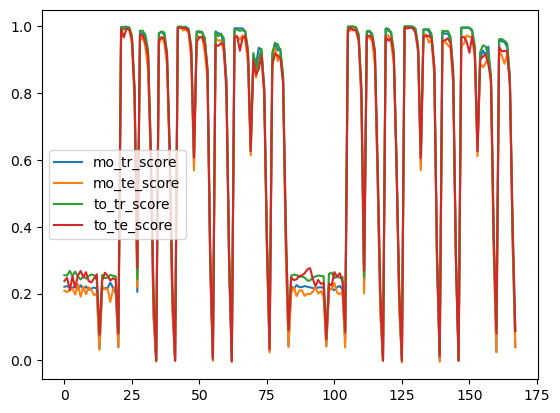

In [34]:
df1.plot(use_index = True, y = ['mo_tr_score', 'mo_te_score', 'to_tr_score', 'to_te_score'])

In [35]:
df1.max()

mo_tr_score    0.999765
mo_te_score    0.997133
to_tr_score    0.999746
to_te_score    0.997073
ly_size             100
activation         tanh
solver              sgd
alpha            1000.0
dtype: object

In [37]:
df1[df1['mo_te_score'] == 0.997133]

,mo_tr_score,mo_te_score,to_tr_score,to_te_score,ly_size,activation,solver,alpha


In [ ]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://stats.stackexchange.com/questions/338255/what-is-effect-of-increasing-number-of-hidden-layers-in-a-feed-forward-nn


print('for estimate motor_UPDRS')
regr1 = MLPRegressor(n_layers_ = 1, hidden_layer_sizes = ?, activation = ?, solver = ?, alpha = ?, early_stopping = True)
X_train_mo, X_test_mo, y_train_mo, y_test_mo = train_test_split(df_X, df_mo, test_size=0.3)
regr1 = regr1.fit( X_train_mo, y_train_mo)
print('the training set R^2', regr1.score(X_train_mo, y_train_mo))
print('the test set R^2',regr1.score(X_test_mo,y_test_mo))


print('for estimate total_UPDRS')
regr2 = MLPRegressor(n_layers_ = 1, hidden_layer_sizes = ?, activation = ?, solver = ?, alpha = ?, early_stopping = True)
X_train_to, X_test_to, y_train_to, y_test_to = train_test_split(df_X, df_to, test_size=0.3)
regr2 = regr2.fit(X_train_to, y_train_to)
print('the training set R^2',regr2.score(X_train_to, y_train_to))
print('the test set R^2',regr2.score(X_test_to,y_test_to))